In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
from keras.layers import Input

In [2]:
encoding_dam = 32
input_img = keras.Input(shape=(784,))

In [3]:
(X_train, _),(X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#cleaning and reshaping the data as required by the model
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test =  X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)
                          

(60000, 784)
(10000, 784)


In [5]:
input_img = Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)


In [6]:
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [7]:
autoencoder = keras.Model(input_img,decoded)

In [8]:
autoencoder = keras.Model(input_img,decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [9]:
history=autoencoder.fit(X_train, X_train,
                       epochs=50,
                       batch_size=256,
                       shuffle=True,
                       validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.2600 - val_loss: 0.1724
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1522 - val_loss: 0.1379
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1327 - val_loss: 0.1260
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1247 - val_loss: 0.1201
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1190 - val_loss: 0.1150
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1140 - val_loss: 0.1105
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1101 - val_loss: 0.1075
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1074 - val_loss: 0.1054
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1051 - val_loss: 0.1032
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1031 - val_loss: 0.1012

In [10]:
encoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [11]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               1011

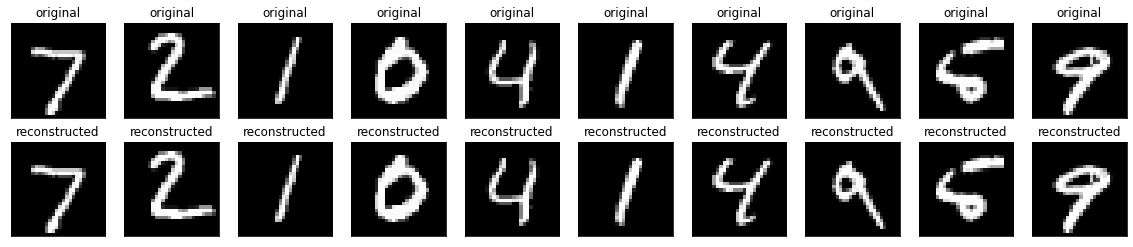

In [12]:
import matplotlib.pyplot as plt
n=10  # how many digit we will display
plt.figure(figsize=(20,4))
for i in range(n):
    #Display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display recostruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(X_test[i].reshape(28,28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    

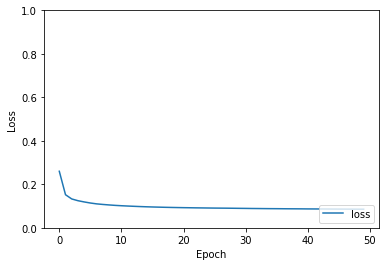

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')